# 3. Stohastic Gradient Descent

## 이전 챕터

- fully connected network를 구축하였으며 이 때, 네트워크의모든 가중치는 무작위로 설정된다.
- 이번챕터에서 신경망을 훈련시키는 방법을 배운다.
- 네트워크 훈련은 가중치를 조정하며 학습된다. 이 때, 얼마나 예측이 좋은지 측정하는 함수가 **손실 함수(loss function)** 이다. 

## Loss Function

- 손실 함수 : 대상의 실제값과 모델의 예측값의 차이를 측정
- 회귀문제에서 일반적인 loss function은 평균절대오차라고 부르는 MAE (즉, 실제값과 예측값의 절대 차이의 평균값을 의미)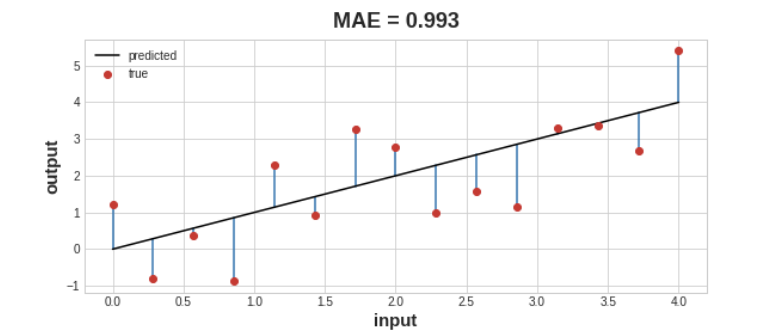
- MAE 이외에도 MSE, Huber 손실 함수 등 존재함
- 즉, 이러한 손실함수는 네트워크에 목표를 알려주는 가중치의 올바른 값을 찾기 위한 가이드 역할을 합니다.

## Optimizer

- Optimizer: 앞에서 언급한 loss function의 손실을 최소화하기 위해 가중치를 조정하는 알고리즘
- 딥러닝에 사용되는 거의 모든 최적화 알고리즘은 stochastic gradient descent , 즉 확률적 경사하강법에 속한다.
    -  네트워크를 단계적으로 훈련시키는 반복 알고리즘입니다.
        1. 훈련 데이터를 샘플링하고 네트워크를 통해 실행하여 예측합니다.
        2. 예측과 실제 값 사이의 손실을 측정합니다.
        3. 마지막으로 손실을 줄이는 방향으로 가중치를 조정합니다.
        4. 그런 다음 손실이 원하는만큼 작아 질 때까지 (또는 더 이상 감소하지 않을 때까지) 계속 반복한다.
 
==> 가중치가 실제 값에 가까워 질수록 손실이 작아지는 것을 볼 수 있습니다.
 

## Learning Rate and Batch Size

- training data의 각각의 iteration을 minibatch 라고 하며 학습 데이터의 전체 round를 Epoch라 부릅니다.
- 변화는 각 배치의 방향으로 약간만 이동하지만, 이러한 변화의 크기를 결정하는 것이 Learning Rate(학습률)이다. 
- 학습률이 낮을수록 네트워크는 가중치가 최상의 값으로 수렴되기 전, 더 많은 미니 배치를 확인해야 함
- 즉, **learning rate** 와 **size of the minibatchs**는 SGD 훈련 과정에서 상당한 영향을 미치는 두가지 파라피터 이다. (실습)


- 추가적으로 Adam 은 매개변수 조정없이 대부분의 문제에 적합한 적응형 학습률을 가진 SGD 알고리즘이다. 
- 모델을 정의한 후, loss function과 optimizer를 `model.compile` method를 이용한다.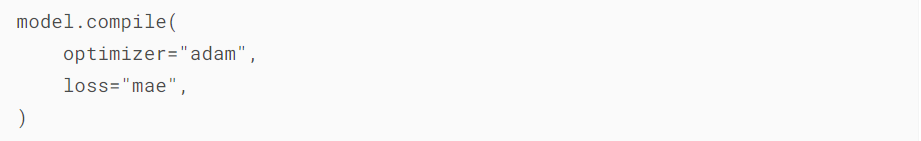

## 실습

In [1]:
import pandas as pd

fuel = pd.read_csv('data/fuel.csv')

X = fuel.copy() #원본 데이터 변수로 할당
X.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [2]:
# 종속변수제거
y = X.pop('FE')

In [5]:
X.dtypes

EngDispl               float64
NumCyl                   int64
Transmission            object
AirAspirationMethod     object
NumGears                 int64
TransLockup              int64
TransCreeperGear         int64
DriveDesc               object
IntakeValvePerCyl        int64
ExhaustValvesPerCyl      int64
CarlineClassDesc        object
VarValveTiming           int64
VarValveLift             int64
dtype: object

#### 1. 원핫 인코딩과 표준화 파이프라인 구축

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split


preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),# dtype이 number 인 수치형에 대해 표준화를 실시
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),# dtype이 object 인 명목형에 대해 onehotEncoder를 실시
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


#### ***로그 변환은 언제쓰는가??***

- 

#### 2. 모델 구축

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

#### 3. loss와 optimizer 설정

In [9]:
model.compile(
    optimizer='adam',
    loss='mae'
)

#### 4. 모델 학습!!

- **batch_size 32, epoch 200**

In [26]:
history = model.fit(
    X, y,
    batch_size=32,
    epochs=200
)

Epoch 1/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0429
Epoch 2/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0588
Epoch 3/200
35/35 [==============================] - 0s 883us/step - loss: 0.0537
Epoch 4/200
35/35 [==============================] - 0s 912us/step - loss: 0.0504
Epoch 5/200
35/35 [==============================] - 0s 769us/step - loss: 0.0442
Epoch 6/200
35/35 [==============================] - 0s 883us/step - loss: 0.0456
Epoch 7/200
35/35 [==============================] - 0s 912us/step - loss: 0.0455
Epoch 8/200
35/35 [==============================] - 0s 798us/step - loss: 0.0563
Epoch 9/200
35/35 [==============================] - 0s 883us/step - loss: 0.0690
Epoch 10/200
35/35 [==============================] - 0s 912us/step - loss: 0.0531
Epoch 11/200
35/35 [==============================] - 0s 883us/step - loss: 0.0466
Epoch 12/200
35/35 [==============================] - 0s 826us/step - loss: 0.0447
Epoch 13/200
35/3

35/35 [==============================] - 0s 826us/step - loss: 0.0347
Epoch 101/200
35/35 [==============================] - 0s 883us/step - loss: 0.0321
Epoch 102/200
35/35 [==============================] - 0s 769us/step - loss: 0.0311
Epoch 103/200
35/35 [==============================] - 0s 712us/step - loss: 0.0339
Epoch 104/200
35/35 [==============================] - 0s 798us/step - loss: 0.0362
Epoch 105/200
35/35 [==============================] - 0s 741us/step - loss: 0.0326
Epoch 106/200
35/35 [==============================] - 0s 741us/step - loss: 0.0338
Epoch 107/200
35/35 [==============================] - 0s 827us/step - loss: 0.0390
Epoch 108/200
35/35 [==============================] - 0s 769us/step - loss: 0.0384
Epoch 109/200
35/35 [==============================] - 0s 798us/step - loss: 0.0317
Epoch 110/200
35/35 [==============================] - 0s 883us/step - loss: 0.0348
Epoch 111/200
35/35 [==============================] - 0s 769us/step - loss: 0.0361
Epoch 

35/35 [==============================] - 0s 855us/step - loss: 0.0306
Epoch 198/200
35/35 [==============================] - 0s 883us/step - loss: 0.0298
Epoch 199/200
35/35 [==============================] - 0s 712us/step - loss: 0.0302
Epoch 200/200
35/35 [==============================] - 0s 769us/step - loss: 0.0310


In [27]:
history_df = pd.DataFrame(history.history)
history_df

,loss
0,0.042869
1,0.058787
2,0.053697
3,0.050360
4,0.044246
...,...
195,0.035769
196,0.030646
197,0.029850
198,0.030188


- epoch마다의 loss가 저장됨
- 이를 시각화

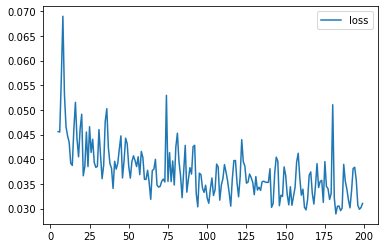

In [28]:
history_df.loc[5:, ['loss']].plot();

- **batch_size 16, epoch 200**

In [29]:
history = model.fit(
    X, y,
    batch_size=16,
    epochs=200
)

Epoch 1/200
70/70 [==============================] - 0s 955us/step - loss: 0.0428
Epoch 2/200
70/70 [==============================] - 0s 670us/step - loss: 0.0472
Epoch 3/200
70/70 [==============================] - 0s 698us/step - loss: 0.0523
Epoch 4/200
70/70 [==============================] - 0s 684us/step - loss: 0.0577
Epoch 5/200
70/70 [==============================] - 0s 670us/step - loss: 0.0530
Epoch 6/200
70/70 [==============================] - 0s 712us/step - loss: 0.0429
Epoch 7/200
70/70 [==============================] - 0s 755us/step - loss: 0.0493
Epoch 8/200
70/70 [==============================] - 0s 698us/step - loss: 0.0577
Epoch 9/200
70/70 [==============================] - 0s 712us/step - loss: 0.0454
Epoch 10/200
70/70 [==============================] - 0s 670us/step - loss: 0.0435
Epoch 11/200
70/70 [==============================] - 0s 670us/step - loss: 0.0496
Epoch 12/200
70/70 [==============================] - 0s 684us/step - loss: 0.0404
Epoch 13/200


70/70 [==============================] - 0s 698us/step - loss: 0.0387
Epoch 100/200
70/70 [==============================] - 0s 727us/step - loss: 0.0354
Epoch 101/200
70/70 [==============================] - 0s 670us/step - loss: 0.0369
Epoch 102/200
70/70 [==============================] - 0s 655us/step - loss: 0.0324
Epoch 103/200
70/70 [==============================] - 0s 812us/step - loss: 0.0302
Epoch 104/200
70/70 [==============================] - 0s 784us/step - loss: 0.0310
Epoch 105/200
70/70 [==============================] - 0s 912us/step - loss: 0.0382
Epoch 106/200
70/70 [==============================] - 0s 869us/step - loss: 0.0340
Epoch 107/200
70/70 [==============================] - 0s 744us/step - loss: 0.0325
Epoch 108/200
70/70 [==============================] - 0s 784us/step - loss: 0.0332
Epoch 109/200
70/70 [==============================] - 0s 684us/step - loss: 0.0309
Epoch 110/200
70/70 [==============================] - 0s 712us/step - loss: 0.0312
Epoch 

70/70 [==============================] - 0s 712us/step - loss: 0.0314
Epoch 197/200
70/70 [==============================] - 0s 698us/step - loss: 0.0328
Epoch 198/200
70/70 [==============================] - 0s 684us/step - loss: 0.0315
Epoch 199/200
70/70 [==============================] - 0s 698us/step - loss: 0.0299
Epoch 200/200
70/70 [==============================] - 0s 655us/step - loss: 0.0314


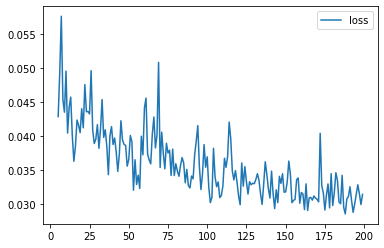

In [30]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot();

- **batch_size 128, epoch 200**

In [31]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

Epoch 1/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0285
Epoch 2/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0240
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 5/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 6/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0196
Epoch 7/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 8/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0175
Epoch 9/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0176
Epoch 10/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 11/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 12/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 13/200
9/9 [==============================] - 0s 1ms/st

9/9 [==============================] - 0s 997us/step - loss: 0.0169
Epoch 105/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 106/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0171
Epoch 107/200
9/9 [==============================] - 0s 997us/step - loss: 0.0172
Epoch 108/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0165
Epoch 109/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 110/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0164
Epoch 111/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0179
Epoch 112/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 113/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 114/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 115/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 116/200
9/9 [==============================]

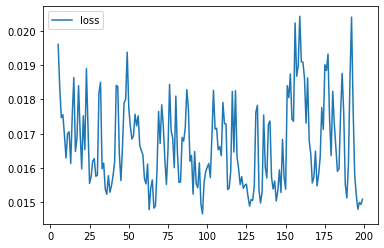

In [32]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot();

#### 결론

- 학습 중 손실이 어떻게 변하는지 batch size마다 달라지는것을 확인할 수있다.
- 현재 데이터상, batch_size를 128로 하였을 때 loss가 변화폭이 매우 크며 올라갔다 내려갔다 하는 형태로 학습이 제대로 이루어지지 않는 추세임을 확인할 수 있다. 
- 이는 따라서, batch_size를 줄여서 시간이 다소 더 걸리더라도 작은 샘플이 더 많은 추정치를 제공하는 경향이 있어 "평균화"효과를 가진다는 점에서 더 효과적임을 확인할 수 있다.